In [9]:
# test collapsed gibbs sampler

import numpy as np

In [1]:
import sys
sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)

['/Users/david/Documents/mastersCode/ubm/tuts/gaussian_mixture_models/tests', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm']


In [2]:
sys.path.append("/Users/david/Documents/mastersCode/ubm/tuts/gaussian_mixture_models/gibbs/kamper")

In [3]:
print(sys.path)

['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug', '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev', '/Users/david/Documents/mastersCode/ubm/tuts/gaussian_mixture_models/tests', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm', '/Users/david/Documents/mastersCode/ubm/tuts/gaussian_mixture_models/gibbs/kamper']


In [28]:
from tuts.gaussian_mixture_models.gibbs.kamper import niw, fbgmm
from tuts.gaussian_mixture_models.gibbs.kamper.plot_utils import plot_mixture_model, plot_ellipse, colors
from importlib import reload
reload(fbgmm)

<module 'tuts.gaussian_mixture_models.gibbs.kamper.fbgmm' from '/Users/david/Documents/mastersCode/ubm/tuts/gaussian_mixture_models/gibbs/kamper/fbgmm.py'>

In [24]:
# # Data parameters
# D = 2           # dimensions
# N = 100         # number of points to generate
# K_true = 4      # the true number of components
#
# # Model parameters
# alpha = 1.
# K = 4           # number of components
# n_iter = 20
#
# # Generate data
# mu_scale = 4.0
# covar_scale = 0.7
# z_true = np.random.randint(0, K_true, N)
# mu = np.random.randn(D, K_true)*mu_scale
# X = mu[:, z_true] + np.random.randn(D, N)*covar_scale
# X = X.T

In [25]:
print("Loading a Data Set")
x = np.loadtxt("../data/data_3_clusters.txt") # Observation1(Corresponds to x_1 in the graphical model)
z_truth_n = np.loadtxt("../data/data_3_clusters_labels.txt") # True label (True z_n)
K = 3 # Number of clusters
N = len(x) # Number of data
D = len(x[0]) # Number of dimention
print(f"Number of clusters: {K}"); print(f"Number of data: {len(x)}");

Loading a Data Set
Number of clusters: 3
Number of data: 250


In [44]:
# first with example given

import random
import logging
import matplotlib.pyplot as plt

# logging.basicConfig(level=logging.INFO)

random.seed(1)
np.random.seed(1)

# Data parameters
D = 2           # dimensions
N = 10          # number of points to generate
K_true = 4      # the true number of components

# Model parameters
alpha = 1.
K = 6           # number of components
n_iter = 10

# Generate data
mu_scale = 4.0
covar_scale = 0.7
z_true = np.random.randint(0, K_true, N)
mu = np.random.randn(D, K_true)*mu_scale
X = mu[:, z_true] + np.random.randn(D, N)*covar_scale
X = X.T

# Intialize prior
m_0 = np.zeros(D)
k_0 = covar_scale**2/mu_scale**2
v_0 = D + 3
S_0 = covar_scale**2*v_0*np.eye(D)
prior = niw.NIW(m_0, k_0, v_0, S_0)

# Setup FBGMM
fmgmm = fbgmm.FBGMM(X, prior, alpha, K, "rand")

# Perform Gibbs sampling
# logger.info("Initial log marginal prob: " + str(fmgmm.log_marg()))
record = fmgmm.gibbs_sample(n_iter)

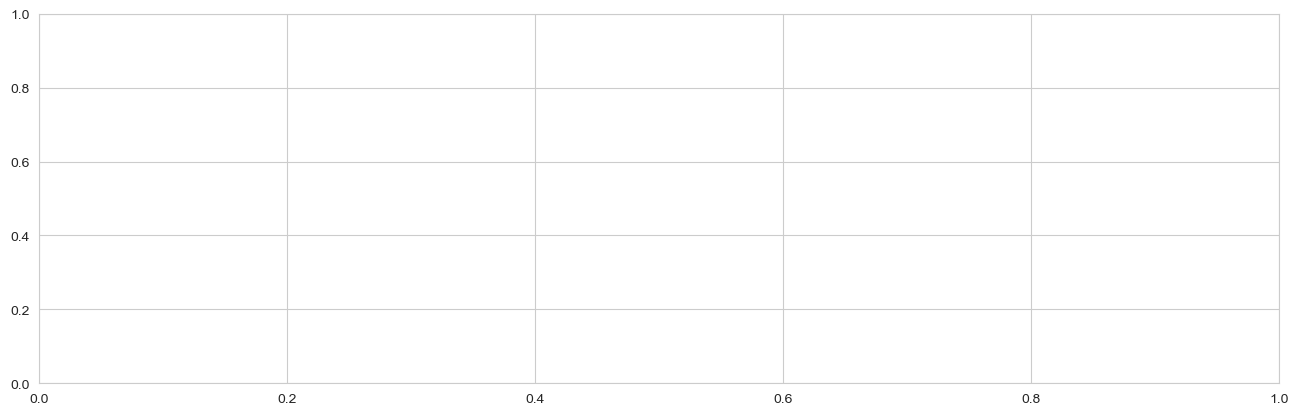

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
for k in range(fmgmm.components.K):
    mu, sigma = fmgmm.components.rand_k(k)
    plot_ellipse(ax, mu, sigma)
plt.show()